In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import math
import tensorflow as tf
print(tf.__version__)

%matplotlib inline

0.10.0rc0


In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
print(type(mnist.train.images), mnist.train.images.shape)
print(type(mnist.train.labels), mnist.train.labels.shape)

(<type 'numpy.ndarray'>, (55000, 784))
(<type 'numpy.ndarray'>, (55000, 10))


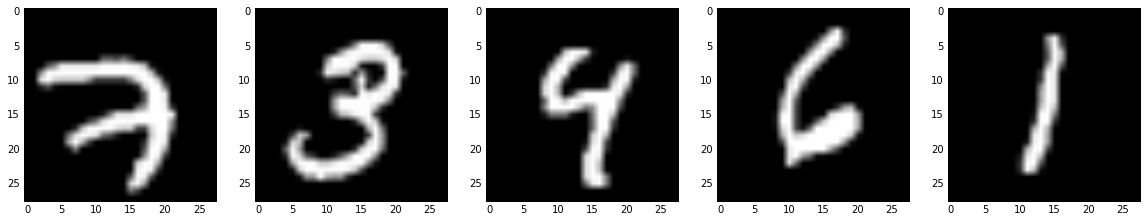

In [4]:
fig = plt.figure(figsize=(20, 5))
for i in range(5):
    img = np.array(mnist.train.images[i])
    img.shape = (28, 28)
    plt.subplot(150 + (i+1))
    plt.imshow(img, cmap='gray')

In [5]:
print(type(mnist.validation.images), mnist.validation.images.shape)
print(type(mnist.validation.labels), mnist.validation.labels.shape)

(<type 'numpy.ndarray'>, (5000, 784))
(<type 'numpy.ndarray'>, (5000, 10))


In [6]:
print(type(mnist.test.images), mnist.test.images.shape)
print(type(mnist.test.labels), mnist.test.labels.shape)

(<type 'numpy.ndarray'>, (10000, 784))
(<type 'numpy.ndarray'>, (10000, 10))


In [7]:
W_ = np.array([[1, 2, 3], [4, 5, 6]])  #shape of W: (2, 3)
x_ = np.array([[1, 2]])                #shape of x: (1, 2)
xW_ = np.dot(x_, W_)                     #shape of xW: (1, 3)
print(W_.shape, x_.shape, xW_.shape)
print(xW_)

print()

b_ = np.array([10, 20, 30])            #shape of b: (3,)
u_ = xW_ + b_                            #shape of u: (1, 3) 
print(b_.shape, u_.shape)
print(u_)

((2, 3), (1, 2), (1, 3))
[[ 9 12 15]]
()
((3,), (1, 3))
[[19 32 45]]


In [8]:
batch_images, batch_labels = mnist.train.next_batch(100)
print(batch_images.shape)
#print batch_images
print

print(batch_labels.shape)
#print batch_labels

(100, 784)

(100, 10)


In [9]:
W_ = np.array([[1, 2, 3], [4, 5, 6]])                    #shape of W: (2, 3)
x_ = np.array([[1, 2], [1, 2], [1, 2], [1, 2], [1, 2]])  #shape of x: (5, 2)
xW_ = np.dot(x_, W_)                                       #shape of xW: (5, 3)
print(W_.shape, x_.shape, xW_.shape)
print(xW_)

print()

b_ = np.array([10, 20, 30])            #shape of b: (3,)
u_ = xW_ + b_                            #shape of u: (1, 3) 
print(b_.shape, u_.shape)
print(u_)

((2, 3), (5, 2), (5, 3))
[[ 9 12 15]
 [ 9 12 15]
 [ 9 12 15]
 [ 9 12 15]
 [ 9 12 15]]
()
((3,), (5, 3))
[[19 32 45]
 [19 32 45]
 [19 32 45]
 [19 32 45]
 [19 32 45]]


In [10]:
x = tf.placeholder(tf.float32, [None, 784])
print("x -", x.get_shape())

('x -', TensorShape([Dimension(None), Dimension(784)]))


In [11]:
y_target = tf.placeholder(tf.float32, [None, 10])

In [12]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
print("W -", W.get_shape())
print("b -", b.get_shape())

('W -', TensorShape([Dimension(784), Dimension(10)]))
('b -', TensorShape([Dimension(10)]))


In [13]:
u = tf.matmul(x, W) + b
print("u -", u.get_shape())

('u -', TensorShape([Dimension(None), Dimension(10)]))


In [14]:
learning_rate = 0.05
error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=u, labels=y_target))
optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(error)

Total batch: 550
Epoch:  0, Train Error: 2.30271, Validation Error: 2.30257, Test Accuracy: 0.09800
Epoch:  1, Train Error: 0.45252, Validation Error: 0.43107, Test Accuracy: 0.88990
Epoch:  2, Train Error: 0.38838, Validation Error: 0.36740, Test Accuracy: 0.90160
Epoch:  3, Train Error: 0.36010, Validation Error: 0.33991, Test Accuracy: 0.90870
Epoch:  4, Train Error: 0.34428, Validation Error: 0.32497, Test Accuracy: 0.91140
Epoch:  5, Train Error: 0.33267, Validation Error: 0.31429, Test Accuracy: 0.91330
Epoch:  6, Train Error: 0.32444, Validation Error: 0.30598, Test Accuracy: 0.91500
Epoch:  7, Train Error: 0.31756, Validation Error: 0.30056, Test Accuracy: 0.91590
Epoch:  8, Train Error: 0.31210, Validation Error: 0.29611, Test Accuracy: 0.91640
Epoch:  9, Train Error: 0.30756, Validation Error: 0.29211, Test Accuracy: 0.91850
Epoch: 10, Train Error: 0.30457, Validation Error: 0.29026, Test Accuracy: 0.91820
Epoch: 11, Train Error: 0.30152, Validation Error: 0.28723, Test Accur

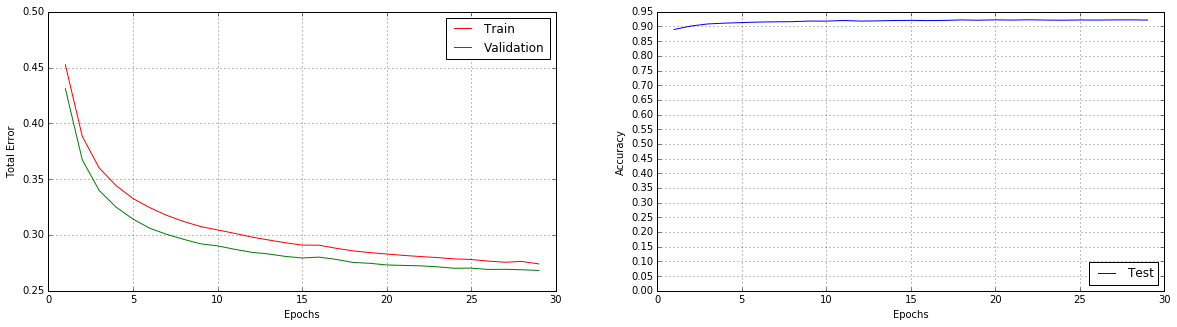

[7 2 1 ..., 4 5 6]
[7 2 1 ..., 4 5 6]
('Number of False Prediction:', 775)
False Prediction Index: 8, Prediction: 6, Ground Truth: 5
False Prediction Index: 33, Prediction: 6, Ground Truth: 4
False Prediction Index: 63, Prediction: 2, Ground Truth: 3
False Prediction Index: 66, Prediction: 7, Ground Truth: 6
False Prediction Index: 77, Prediction: 7, Ground Truth: 2


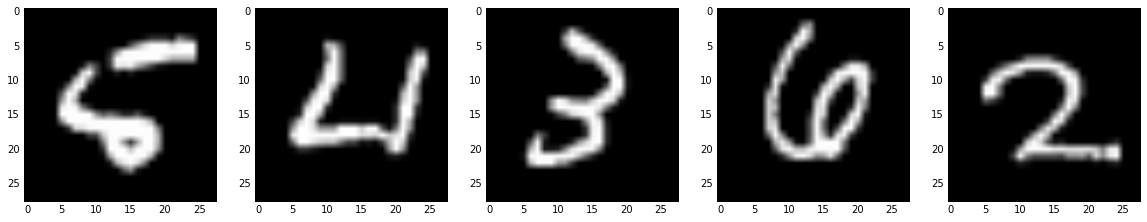

In [16]:
prediction_and_ground_truth = tf.equal(tf.argmax(u, 1), tf.argmax(y_target, 1))
accuracy = tf.reduce_mean(tf.cast(prediction_and_ground_truth, tf.float32))

def draw_error_values_and_accuracy(epoch_list, train_error_list, validation_error_list, test_accuracy_list):
    # Draw Error Values and Accuracy
    fig = plt.figure(figsize=(20, 5))
    plt.subplot(121)
    plt.plot(epoch_list[1:], train_error_list[1:], 'r', label='Train')
    plt.plot(epoch_list[1:], validation_error_list[1:], 'g', label='Validation')
    plt.ylabel('Total Error')
    plt.xlabel('Epochs')
    plt.grid(True)
    plt.legend(loc='upper right')

    plt.subplot(122)
    plt.plot(epoch_list[1:], test_accuracy_list[1:], 'b', label='Test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.yticks(np.arange(0.0, 1.0, 0.05))
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.show()
    
def draw_false_prediction(diff_index_list):
    fig = plt.figure(figsize=(20, 5))
    for i in range(5):
        j = diff_index_list[i]
        print("False Prediction Index: %s, Prediction: %s, Ground Truth: %s" % (j, prediction[j], ground_truth[j]))
        img = np.array(mnist.test.images[j])
        img.shape = (28, 28)
        plt.subplot(150 + (i+1))
        plt.imshow(img, cmap='gray')
    
with tf.Session() as sess:
    init = tf.initialize_all_variables()
    sess.run(init)
    
    batch_size = 100
    total_batch = int(math.ceil(mnist.train.num_examples/float(batch_size)))
    print("Total batch: %d" % total_batch)    

    training_epochs = 30
    epoch_list = []
    train_error_list = []
    validation_error_list = []
    test_accuracy_list = []
    for epoch in range(training_epochs):
        epoch_list.append(epoch)
        # Train Error Value
        train_error_value = sess.run(error, feed_dict={x: mnist.train.images, y_target: mnist.train.labels})
        train_error_list.append(train_error_value)
        
        validation_error_value = sess.run(error, feed_dict={x: mnist.validation.images, y_target: mnist.validation.labels})
        validation_error_list.append(validation_error_value)
        
        test_accuracy_value = sess.run(accuracy, feed_dict={x: mnist.test.images, y_target: mnist.test.labels})
        test_accuracy_list.append(test_accuracy_value) 
        print("Epoch: {0:2d}, Train Error: {1:0.5f}, Validation Error: {2:0.5f}, Test Accuracy: {3:0.5f}".format(epoch, train_error_value, validation_error_value, test_accuracy_value))
        
        for i in range(total_batch):
            batch_images, batch_labels = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={x: batch_images, y_target: batch_labels})
    

    # Draw Graph about Error Values & Accuracy Values
    draw_error_values_and_accuracy(epoch_list, train_error_list, validation_error_list, test_accuracy_list)
    
    # False Prediction Profile
    prediction = sess.run(tf.argmax(u, 1), feed_dict={x:mnist.test.images})
    ground_truth = sess.run(tf.argmax(y_target, 1), feed_dict={y_target:mnist.test.labels})

    print(prediction)
    print(ground_truth)

    diff_index_list = []
    for i in range(mnist.test.num_examples):
        if (prediction[i] != ground_truth[i]):
            diff_index_list.append(i)
            
    print("Number of False Prediction:", len(diff_index_list))
    draw_false_prediction(diff_index_list)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Total batch: 550
Epoch:  0, Train Error: 833.95886, Validation Error: 834.09119, Test Accuracy: 0.07070
Epoch:  1, Train Error: 1.99984, Validation Error: 2.07650, Test Accuracy: 0.47520
Epoch:  2, Train Error: 1.26843, Validation Error: 1.26711, Test Accuracy: 0.60960
Epoch:  3, Train Error: 1.08160, Validation Error: 1.13562, Test Accuracy: 0.67780
Epoch:  4, Train Error: 1.02253, Validation Error: 1.08177, Test Accuracy: 0.70280
Epoch:  5, Train Error: 0.86850, Validation Error: 0.91139, Test Accuracy: 0.74130
Epoch:  6, Train Error: 0.72227, Validation Error: 0.75998, Test Accuracy: 0.78300
Epoch:  7, Train Error: 0.85792, Validation Error: 0.89472, Test Accuracy: 0.73320
Epoch:  8, Train Error: 0.66459, Validation Error: 0.69272, Test Accuracy: 0.78370
Epoch:  9, Train Error: 0.64356, Valid

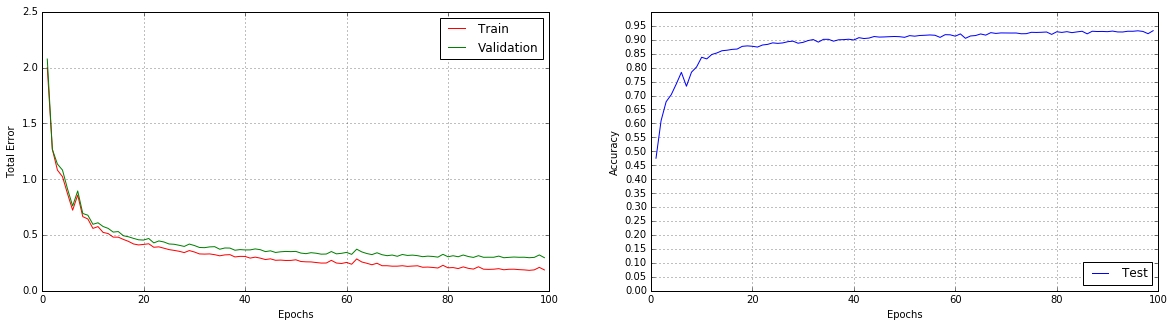

[7 2 1 ..., 4 5 6]
[7 2 1 ..., 4 5 6]
('Number of False Prediction:', 672)
False Prediction Index: 8, Prediction: 4, Ground Truth: 5
False Prediction Index: 33, Prediction: 0, Ground Truth: 4
False Prediction Index: 43, Prediction: 1, Ground Truth: 2
False Prediction Index: 46, Prediction: 3, Ground Truth: 1
False Prediction Index: 62, Prediction: 8, Ground Truth: 9


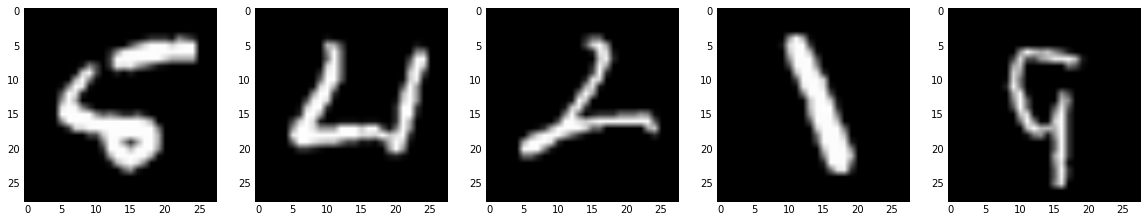

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import math
import tensorflow as tf

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

batch_size = 100
training_epochs = 100
learning_rate = 0.05

epoch_list = []
train_error_list = []
validation_error_list = []
test_accuracy_list = []
diff_index_list = []

# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28)
n_hidden_1 = 128 # 1st layer number of features
n_hidden_2 = 128 # 2nd layer number of features
n_classes = 10 # MNIST total classes (0-9 digits)
    
# Data Preparation
x = tf.placeholder(tf.float32, [None, n_input])
y_target = tf.placeholder(tf.float32, [None, n_classes])

# Model Construction
# Store layers weight & bias
weights = {
    'W1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'W2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# 1st Hidden layer with RELU activation
u2 = tf.matmul(x, weights['W1']) + biases['b1']
z2 = tf.nn.relu(u2)

# 2ndHidden layer with RELU activation
u3 = tf.matmul(z2, weights['W2']) + biases['b2']
z3 = tf.nn.relu(u3)

# Output layer with linear activation
u_out = tf.matmul(z3, weights['out']) + biases['out']

# Target Setup
error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=u_out, labels=y_target))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(error)

# Accuracy   
prediction_and_ground_truth = tf.equal(tf.argmax(u_out, 1), tf.argmax(y_target, 1))
accuracy = tf.reduce_mean(tf.cast(prediction_and_ground_truth, tf.float32))

def draw_error_values_and_accuracy():
    # Draw Error Values and Accuracy
    fig = plt.figure(figsize=(20, 5))
    plt.subplot(121)
    plt.plot(epoch_list[1:], train_error_list[1:], 'r', label='Train')
    plt.plot(epoch_list[1:], validation_error_list[1:], 'g', label='Validation')
    plt.ylabel('Total Error')
    plt.xlabel('Epochs')
    plt.grid(True)
    plt.legend(loc='upper right')

    plt.subplot(122)
    plt.plot(epoch_list[1:], test_accuracy_list[1:], 'b', label='Test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.yticks(np.arange(0.0, 1.0, 0.05))
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.show()
    
def draw_false_prediction():
    fig = plt.figure(figsize=(20, 5))
    for i in range(5):
        j = diff_index_list[i]
        print("False Prediction Index: %s, Prediction: %s, Ground Truth: %s" % (j, prediction[j], ground_truth[j]))
        img = np.array(mnist.test.images[j])
        img.shape = (28, 28)
        plt.subplot(150 + (i+1))
        plt.imshow(img, cmap='gray')
    
with tf.Session() as sess:
    init = tf.initialize_all_variables()
    sess.run(init)
    
    total_batch = int(math.ceil(mnist.train.num_examples/float(batch_size)))
    print("Total batch: %d" % total_batch)    

    for epoch in range(training_epochs):
        epoch_list.append(epoch)
        # Train Error Value
        train_error_value = sess.run(error, feed_dict={x: mnist.train.images, y_target: mnist.train.labels})
        train_error_list.append(train_error_value)
        
        validation_error_value = sess.run(error, feed_dict={x: mnist.validation.images, y_target: mnist.validation.labels})
        validation_error_list.append(validation_error_value)
        
        test_accuracy_value = sess.run(accuracy, feed_dict={x: mnist.test.images, y_target: mnist.test.labels})
        test_accuracy_list.append(test_accuracy_value) 
        print("Epoch: {0:2d}, Train Error: {1:0.5f}, Validation Error: {2:0.5f}, Test Accuracy: {3:0.5f}".format(epoch, train_error_value, validation_error_value, test_accuracy_value))
        
        for i in range(total_batch):
            batch_images, batch_labels = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={x: batch_images, y_target: batch_labels})
    

    # Draw Graph about Error Values & Accuracy Values
    draw_error_values_and_accuracy()
    
    # False Prediction Profile
    prediction = sess.run(tf.argmax(u_out, 1), feed_dict={x:mnist.test.images})
    ground_truth = sess.run(tf.argmax(y_target, 1), feed_dict={y_target:mnist.test.labels})

    print(prediction)
    print(ground_truth)

    for i in range(mnist.test.num_examples):
        if (prediction[i] != ground_truth[i]):
            diff_index_list.append(i)
            
    print("Number of False Prediction:", len(diff_index_list))
    draw_false_prediction()